In [1]:
from Problem import Problem
import networkx as nx
import matplotlib.pyplot as plt
from src.instance import Solution
from src.genetic_algorithm import GeneticAlgorithm
from itertools import product
import pandas as pd
import os

os.makedirs("experiments", exist_ok=True)
num_experiments = len(os.listdir("experiments"))

In [3]:
number_cities = [100,1000]
alphas = [1,2]
betas = [1,2]
densities = [0.2,1]

In [ ]:
for i, (num_cities, alpha, beta, density) in enumerate(product(number_cities, alphas, betas, densities)):
    problem = Problem(num_cities, alpha=alpha, beta=beta, density=density)
    print(f"Testing with {num_cities} cities, alpha={alpha}, beta={beta}, density={density}")
    G = problem.graph
    pos_dict = {k: v['pos'] for k, v in G.nodes(data=True)}
    gold_dict = {n: data['gold'] for n, data in G.nodes(data=True)}
    paths_dict = nx.shortest_path(problem.graph, source=0, weight='dist')
    GA = GeneticAlgorithm(problem, max_generations= 100, mutation_rate=0.7, mutation_choice=0.5)
    best_solution, best_cost = GA.solve()
    base_cost = problem.baseline()
    print(f"Baseline solution: {base_cost}")
    print(f"GA solution: {best_cost}")
    log_dir = f"experiments/exp_{i+num_experiments}"
    os.makedirs(log_dir, exist_ok=True)
    GA.log(log_dir=log_dir)

Testing with 100 cities, alpha=1, beta=1, density=0.2


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 25266.40561851072
GA solution: 16734.024623587808
Testing with 100 cities, alpha=1, beta=1, density=1


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 18266.18579582672
GA solution: 14742.702633876213
Testing with 100 cities, alpha=1, beta=2, density=0.2


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 5334401.927002504
GA solution: 4238603.263859163
Testing with 100 cities, alpha=1, beta=2, density=1


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 5404978.08899582
GA solution: 3802191.736853166
Testing with 100 cities, alpha=2, beta=1, density=0.2


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 50425.30961817918
GA solution: 31912.66391072664
Testing with 100 cities, alpha=2, beta=1, density=1


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 36457.918462372065
GA solution: 26321.583601748684
Testing with 100 cities, alpha=2, beta=2, density=0.2


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 21337285.20315348
GA solution: 16036594.486156592
Testing with 100 cities, alpha=2, beta=2, density=1


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 21619688.99659544
GA solution: 13669820.445311178
Testing with 1000 cities, alpha=1, beta=1, density=0.2


  0%|          | 0/100 [00:00<?, ?it/s]

Baseline solution: 195402.95810394012
GA solution: 171298.12236770868
Testing with 1000 cities, alpha=1, beta=1, density=1


  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
GA.plot_history()

In [2]:
def plot_history(log_path="experiments/exp_0"):
    _, ax = plt.subplots()
    df_history = pd.read_csv(f"{log_path}/ga_history.csv")
    df_history['cumulative_average'] = df_history['best_cost'].expanding().mean()
    ax.plot(df_history['generation'], df_history['cumulative_average'], label='Cumulative Average of Best Cost')
    ax.plot(df_history['generation']-1, df_history['best_cost'], label='Best Cost per Generation', zorder=5)

    df_evaluations = pd.read_csv(f"{log_path}/ga_evaluations.csv")
    ax.scatter(df_evaluations['generation'], df_evaluations['evaluation_cost'], color='red', alpha=0.2, s=2, label='Offspring Evaluation')

    ax.set_xlabel('Generation')
    ax.set_ylabel('Cost')
    ax.legend()
    plt.show()

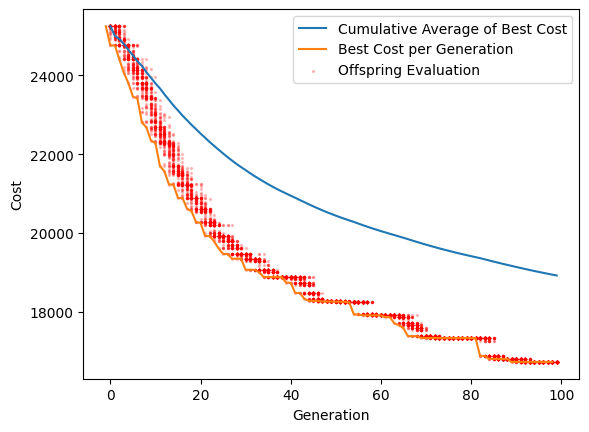

In [3]:
plot_history(log_path="experiments/exp_0")

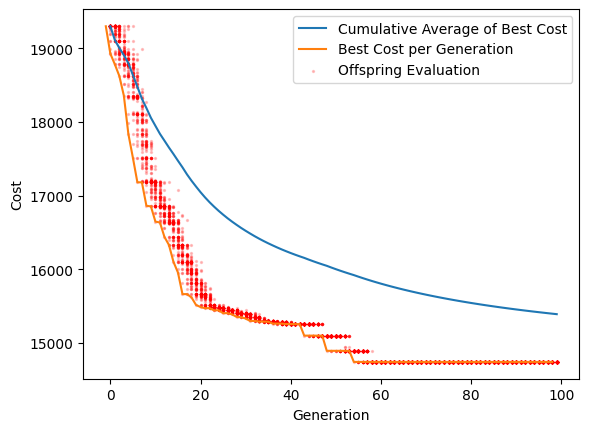

In [4]:
plot_history(log_path="experiments/exp_1")